# Descriptive Analysis 

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
##set a working directory
user = os.path.expanduser('~')
display(user)
os.makedirs(f'{user}/Desktop/thesis/', exist_ok=True)
path = os.chdir(f'{user}/Desktop/'+'thesis/')

'/Users/NatStrom'

In [3]:
data_analysis = pd.read_csv('data_final.csv')

In [4]:
data_analysis

,Unnamed: 0,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,...,death_tot,tot_affect,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn
0,0,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
1,1,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
2,2,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
3,3,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
4,4,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17854,17854,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,654.0,270186.0,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
17855,17855,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,654.0,270186.0,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
17856,17856,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,654.0,270186.0,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
17857,17857,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,654.0,270186.0,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0


In [5]:
data_analysis = data_analysis.drop(columns={'Unnamed: 0'})

In [6]:
print(data_analysis.dtypes)
print(data_analysis.columns)
print(data_analysis.describe(include='all'))

## sanity check to ensure the spread of the data is correct
print('sanity check 1, ensure appropriate years and countries are represented')
list_country=list(list(data_analysis['iso'].drop_duplicates()))
list_year=list(list(data_analysis['year_id'].drop_duplicates()))
print('country list', list_country)
print('year list', list_year)
#inspect for NAs
print('following checks for completeness of all columns')
print(data_analysis['iso'].isnull().values.any())
print(data_analysis['year_id'].isnull().values.any())
print(data_analysis['ihme_dah_total_aid'].isnull().values.any())
print(data_analysis['best_log'].isnull().values.any())
print(data_analysis['daly_all'].isnull().values.any())
print(data_analysis['age0014_value'].isnull().values.any())
print(data_analysis['gdp_pcap_value'].isnull().values.any())
print(data_analysis['xpd_gdp_value'].isnull().values.any())
print(data_analysis['uhc_index'].isnull().values.any())
print(data_analysis['uhc_available_score'].isnull().values.any())
print(data_analysis['access_drinkwater_index'].isnull().values.any())
print(data_analysis['access_sani_index'].isnull().values.any())

iso                                                                                                                      object
year_id                                                                                                                   int64
daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                    float64
daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                    float64
daly_mean_All causes_Unsafe water source_btsx_All ages                                                                  float64
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages    float64
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages                    float64
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages  

In [7]:
data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17859 entries, 0 to 17858
Data columns (total 48 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   iso                                                                                                                   17859 non-null  object 
 1   year_id                                                                                                               17859 non-null  int64  
 2   daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                  17859 non-null  float64
 3   daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                  17859 non-null  float64
 4   daly

## dependent variable

In [8]:
print(data_analysis['daly_all'].describe())
print(data_analysis['daly_all'].info())
#standard deviation should not be 0, that would mean it does not change over time

count    17859.000000
mean     16484.550535
std       9710.700434
min       1908.000000
25%       8813.000000
50%      14596.000000
75%      20698.000000
max      74108.000000
Name: daly_all, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 17859 entries, 0 to 17858
Series name: daly_all
Non-Null Count  Dtype  
--------------  -----  
17859 non-null  float64
dtypes: float64(1)
memory usage: 139.6 KB
None


In [9]:
def nullcounts(ser):
    return ser.isnull().sum()

def custom_describe(frame, func=[nullcounts, 'sum', 'mean', 'median', 'max'],
                    numeric_only=False, **kwargs):
    if numeric_only:
        frame = frame.select_dtypes(include=np.number)
    return frame.agg(func, **kwargs)

custom_describe(data_analysis['daly_all'])

nullcounts    0.000000e+00
sum           2.943976e+08
mean          1.648455e+04
median        1.459600e+04
max           7.410800e+04
Name: daly_all, dtype: float64

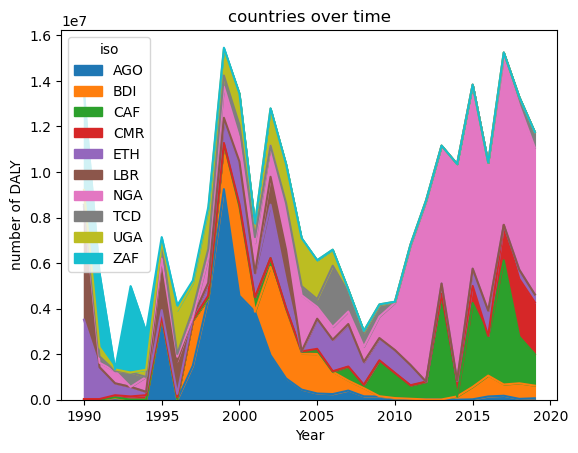

<Figure size 640x480 with 0 Axes>

In [10]:
#time trend of the data
grouped = data_analysis.groupby(['iso', 'year_id']).agg({'daly_all': 'sum'})
top_donors = grouped.groupby('iso').agg({'daly_all': 'sum'}).nlargest(10, 'daly_all').index.tolist()
filtered = grouped[grouped.index.get_level_values('iso').isin(top_donors)]

# Pivot the data to create a column for each donor and a row for each year
pivoted = filtered.reset_index().pivot(index='year_id', columns='iso', values='daly_all')
pivoted.plot.area(stacked=True)

plt.title('countries over time')
plt.xlabel('Year')
plt.ylabel('number of DALY')

# Show the plot
plt.show()
plt.savefig('timetrend_iso.png')

<AxesSubplot: >

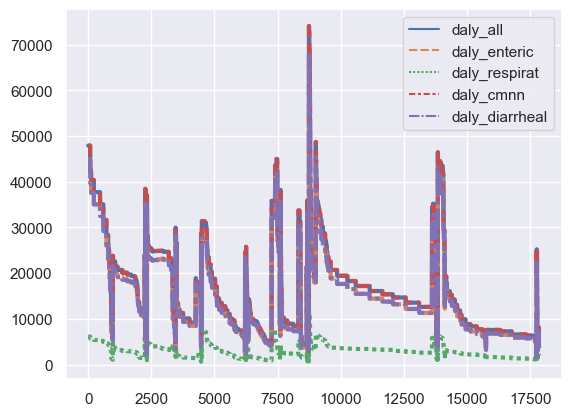

In [11]:
sns.set_theme()
data = pd.DataFrame(data_analysis[["daly_all", "daly_enteric", "daly_respirat", "daly_cmnn","daly_diarrheal"]])

sns.lineplot(data=data, linewidth=3)

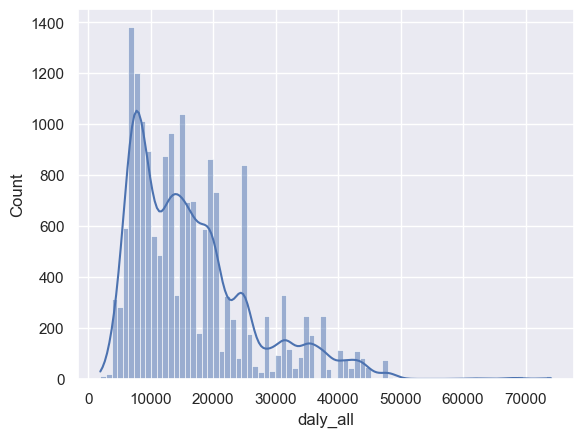

In [12]:
#produce distribution plots
sns.histplot(data_analysis['daly_all'],kde = True)
plt.savefig('daly_all_hist.png')

In [13]:
#test for skweness
import scipy
from scipy.stats import skewtest
scipy.stats.skewtest(data_analysis['daly_all'], axis=0, nan_policy='omit', alternative='two-sided')

SkewtestResult(statistic=56.34781104431561, pvalue=0.0)

In [14]:
#test for outliers
## see data_analysis.daly_all.describe() or the boxplots
### clear indication that there are outliers - now use statistical tests

In [15]:
#test for missingness
values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

## generally 29% missingness, which is strange since it sshould be complete, its estimates

,col,pct_missing
0,iso,0.000000
1,year_id,0.000000
2,daly_mean_All causes_No access to handwashing ...,0.000000
3,daly_mean_All causes_Unsafe sanitation_btsx_Al...,0.000000
4,daly_mean_All causes_Unsafe water source_btsx_...,0.000000
5,"daly_mean_Communicable, maternal, neonatal, an...",0.000000
6,"daly_mean_Communicable, maternal, neonatal, an...",0.000000
7,"daly_mean_Communicable, maternal, neonatal, an...",0.000000
8,daly_mean_Diarrheal diseases_No access to hand...,0.000000
9,daly_mean_Diarrheal diseases_Unsafe sanitation...,0.000000


In [16]:
#what to do with missing data? balanced/ unbalanced panel?


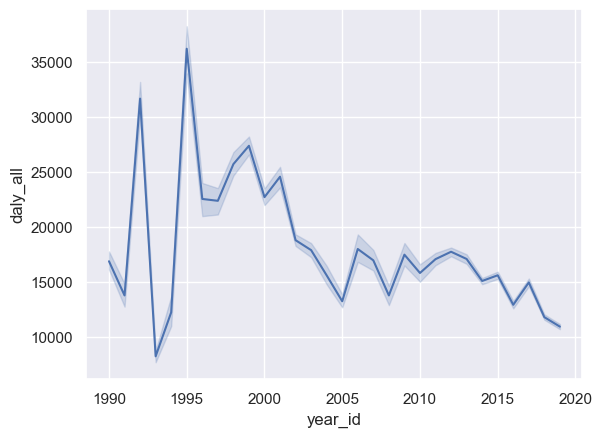

In [17]:
#time trend of the data
sns.lineplot(x='year_id',y='daly_all',data=data_analysis)
plt.savefig('daly_all_timetrend.png')

In [18]:
#judging from the descriptive analysis, need there be any transformations?
##no

## independent variable

binary conflict variable

In [19]:
data_analysis['dummy_conflict'].describe()

count    17859.000000
mean         0.079960
std          0.271238
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dummy_conflict, dtype: float64

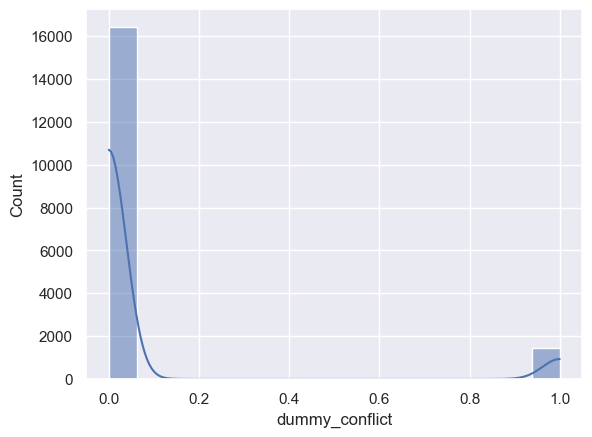

In [20]:
#produce distribution plots
sns.histplot(data_analysis['dummy_conflict'],kde = True)
plt.savefig('dummy_conflict_hist.png')

best_log fatalities

In [21]:
data_analysis['best_log'].describe()

count    17553.000000
mean         1.430614
std          1.185445
min          0.000000
25%          0.693147
50%          1.098612
75%          2.079442
max         10.782782
Name: best_log, dtype: float64

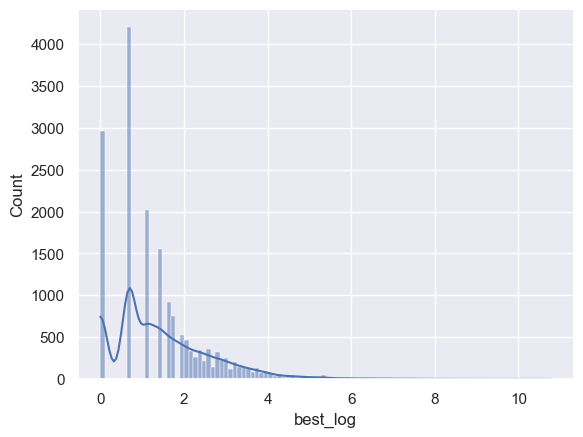

In [22]:
#produce distribution plots
sns.histplot(data_analysis['best_log'],kde = True)
plt.savefig('best_hist.png')

#what does the distribution say? --> log transform the variable

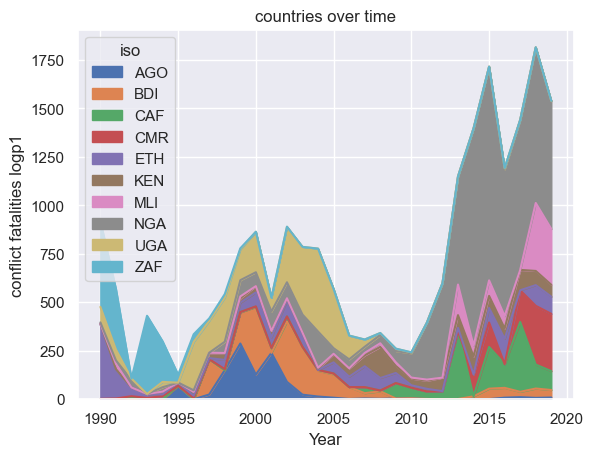

<Figure size 640x480 with 0 Axes>

In [24]:
#time trend of the data
grouped = data_analysis.groupby(['iso', 'year_id']).agg({'best_log': 'sum'})
top_donors = grouped.groupby('iso').agg({'best_log': 'sum'}).nlargest(10, 'best_log').index.tolist()
filtered = grouped[grouped.index.get_level_values('iso').isin(top_donors)]

# Pivot the data to create a column for each donor and a row for each year
pivoted = filtered.reset_index().pivot(index='year_id', columns='iso', values='best_log')
pivoted.plot.area(stacked=True)

plt.title('countries over time')
plt.xlabel('Year')
plt.ylabel('conflict fatalities logp1')

# Show the plot
plt.show()
plt.savefig('timetrend_conflict.png')

In [25]:
##inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)

iso                                                                                                                         0
year_id                                                                                                                     0
daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                        0
daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                        0
daly_mean_All causes_Unsafe water source_btsx_All ages                                                                      0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages        0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages                        0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages                

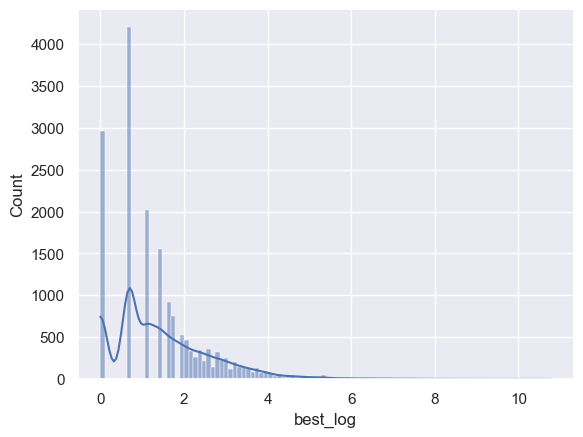

In [26]:
#compare logtransformed with non logtransfomed variables

sns.histplot(data_analysis['best_log'],kde=True)

plt.savefig('conflict_log.png')

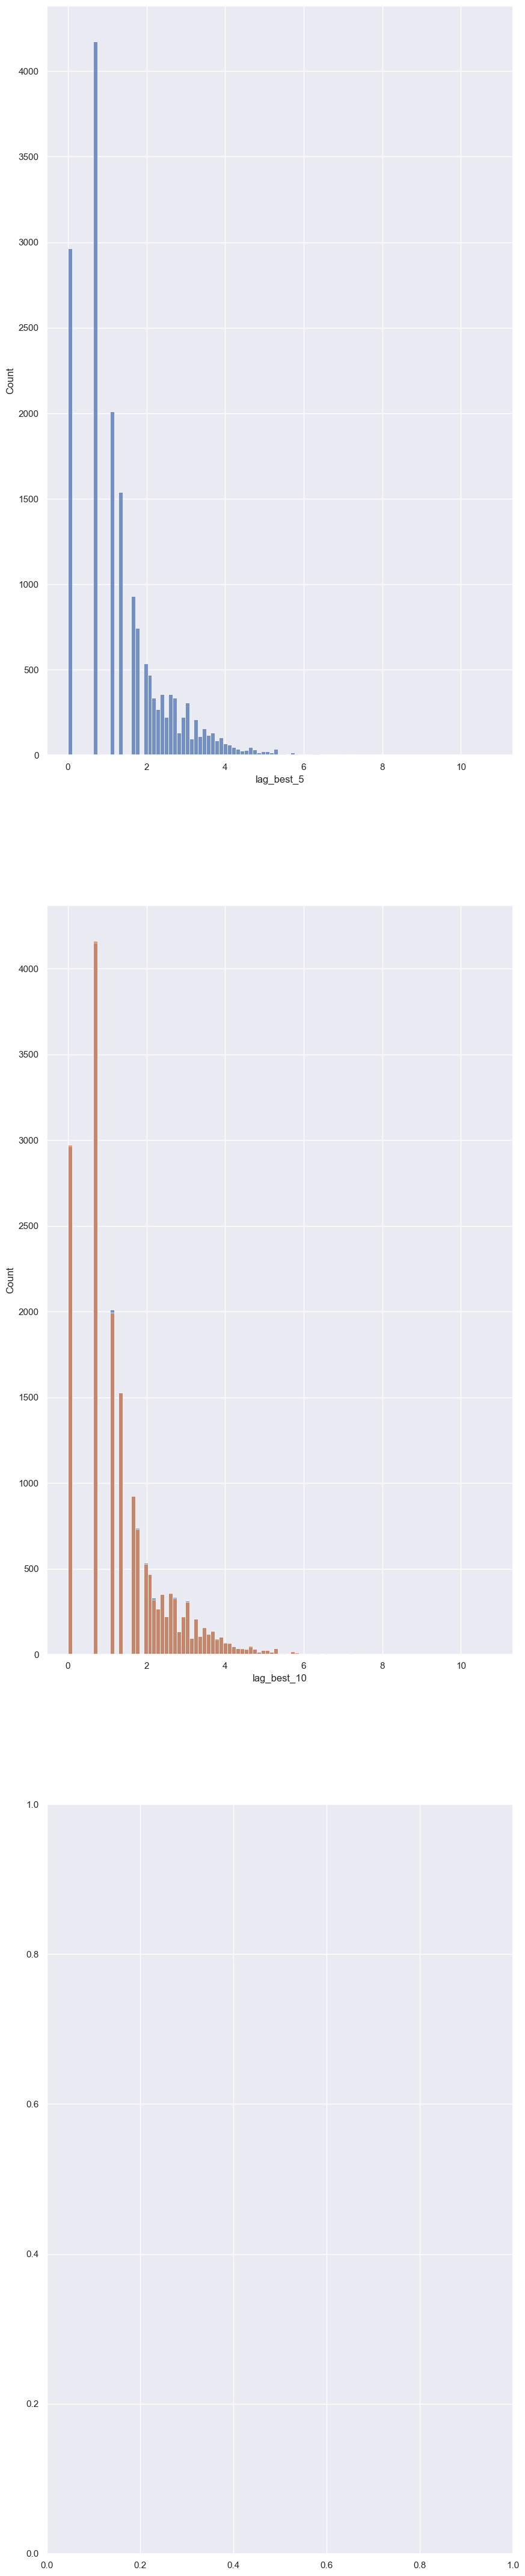

In [27]:
#inspect the conflict lags
figure, axes = plt.subplots(3,1,figsize=(10,55))
sns.histplot(data_analysis['lag_best_5'],ax=axes[0])
sns.histplot(data_analysis['lag_best_10'],ax=axes[1])
sns.histplot(data_analysis['lag_best_20'],ax=axes[1])

plt.savefig('conflict_lag.png')

dummy type of conflict

In [28]:
data_analysis[['dummy_sb','dummy_os','dummy_ns']].describe()

,dummy_sb,dummy_os,dummy_ns
count,17859.000000,17859.000000,17859.000000
mean,0.401758,0.329134,0.251974
std,0.490267,0.469912,0.434158
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


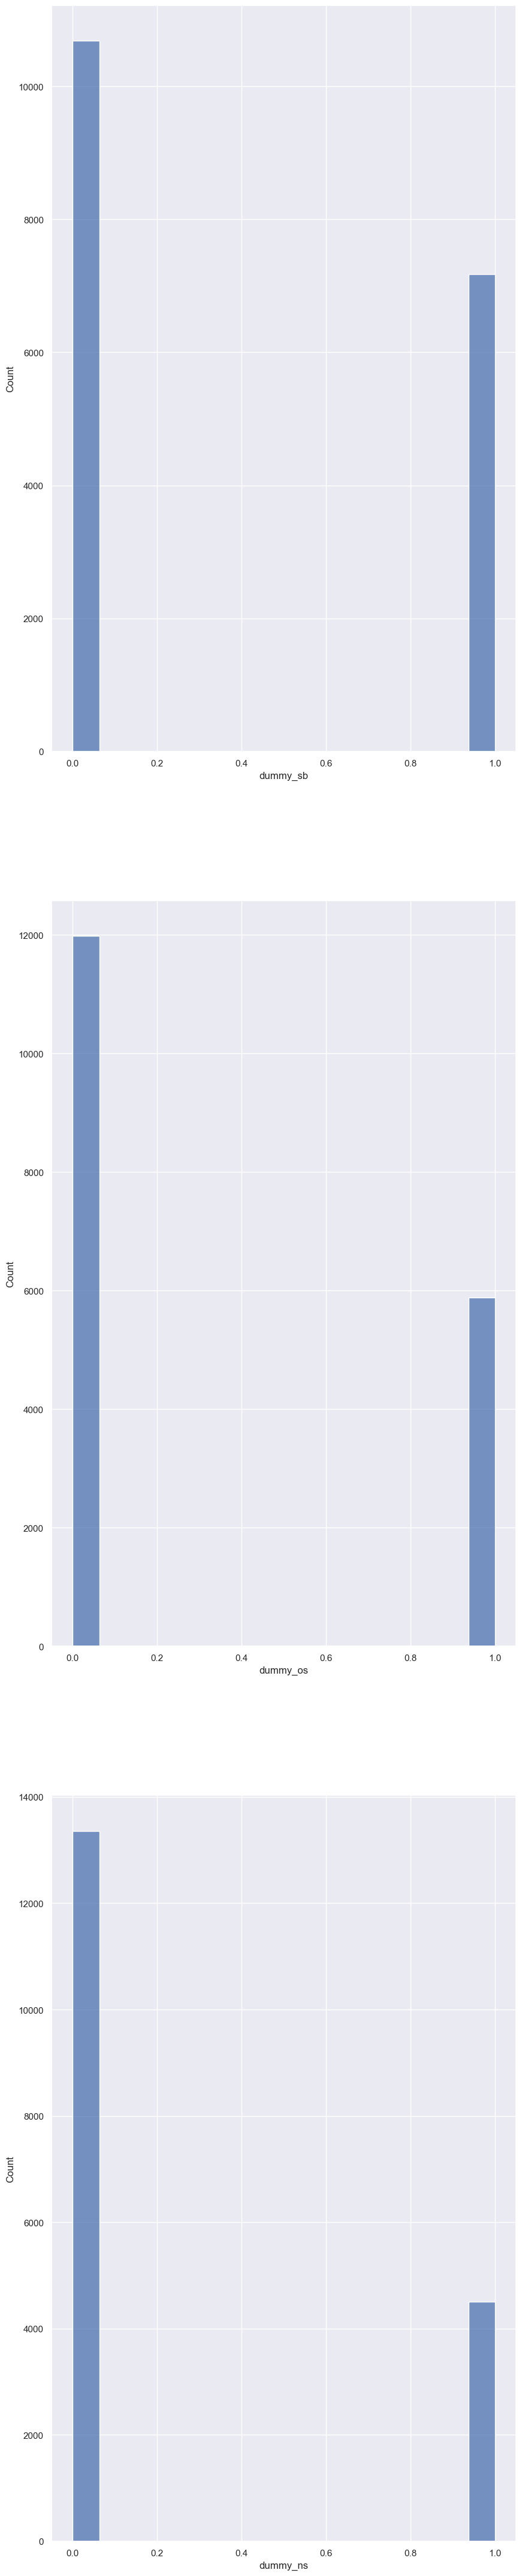

In [29]:
#inspect the conflict lags
figure, axes = plt.subplots(3,1,figsize=(10,55))
sns.histplot(data_analysis['dummy_sb'],ax=axes[0])
sns.histplot(data_analysis['dummy_os'],ax=axes[1])
sns.histplot(data_analysis['dummy_ns'],ax=axes[2])

plt.savefig('conflict_type.png')

dummy neighboring country in conflict

In [30]:
data_analysis['dummy_neighbor'].describe()

count    17689.000000
mean         0.977952
std          0.146843
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: dummy_neighbor, dtype: float64

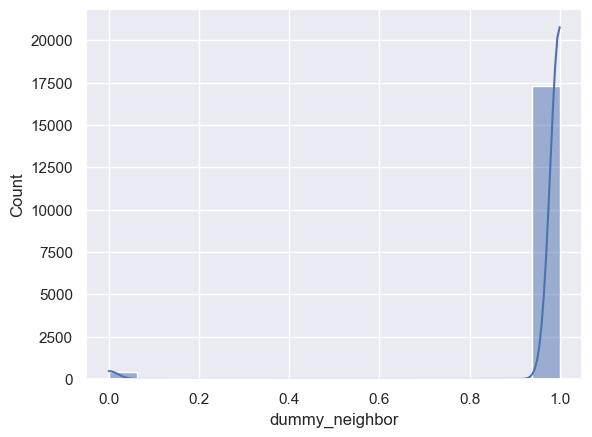

In [31]:
sns.histplot(data_analysis['dummy_neighbor'],kde=True)
plt.savefig('conflict_neighbor.png')

## controls package standard

In [32]:
#get descriptives
print(data_analysis['gdp_log'].describe())
print(data_analysis['age0014_value'].describe())
print(data_analysis['xpd_gdp_value'].describe())
# all variables vary over time, the std is not zero

count    17588.000000
mean         6.739145
std          1.076812
min          4.704661
25%          5.815439
50%          6.733611
75%          7.698112
max          9.142973
Name: gdp_log, dtype: float64
count    17859.000000
mean        44.897596
std          3.298928
min         28.275352
25%         43.522421
50%         44.367955
75%         47.369061
max         50.556055
Name: age0014_value, dtype: float64
count    7732.000000
mean       17.788995
std         6.969941
min         7.693194
25%        11.387627
50%        16.145440
75%        24.935180
max        46.492018
Name: xpd_gdp_value, dtype: float64


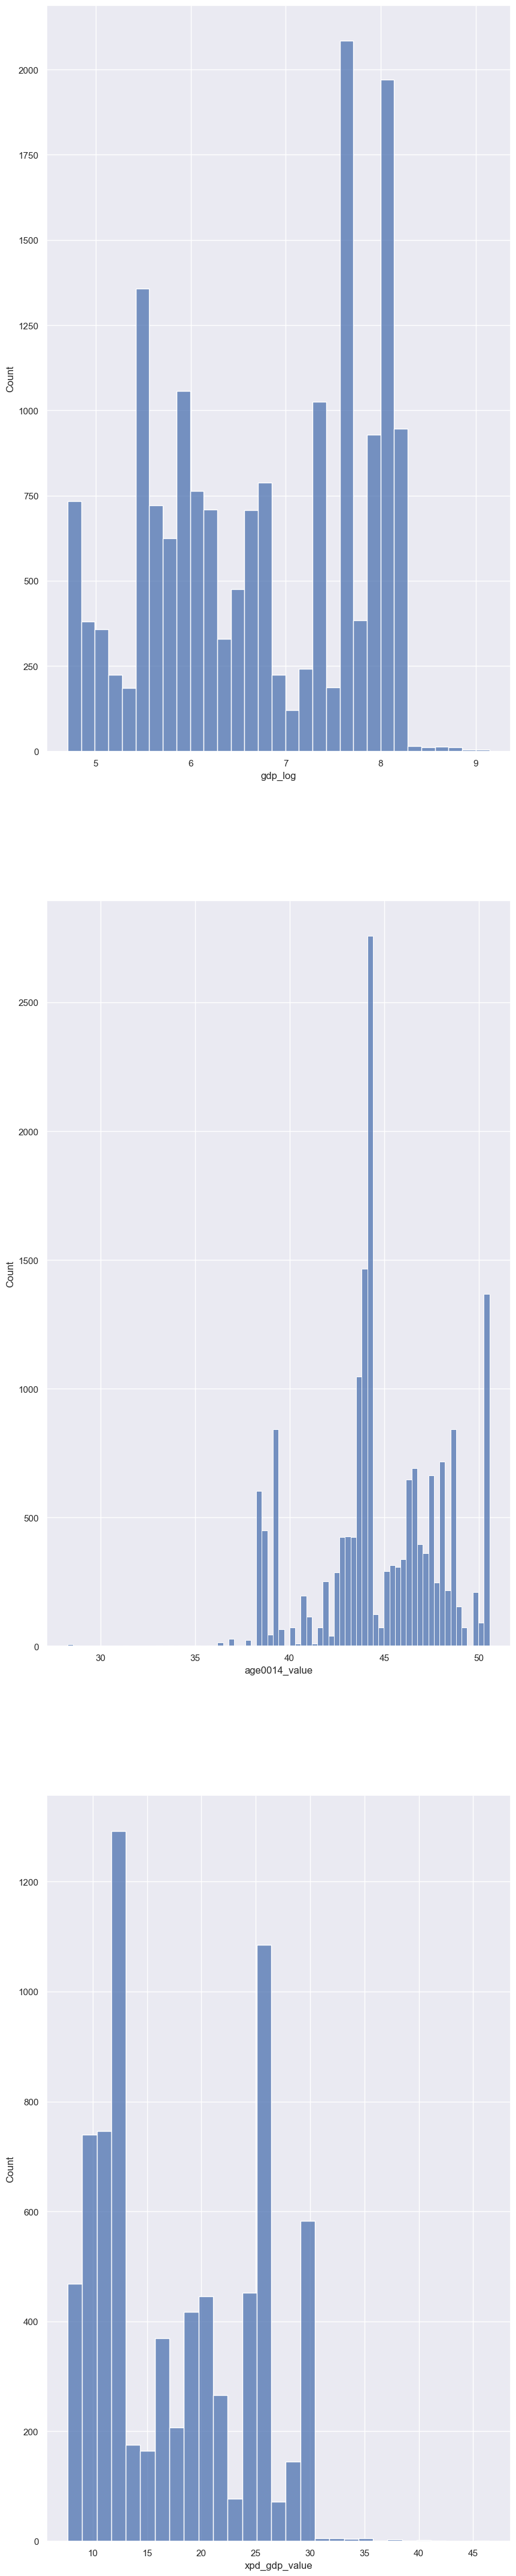

In [33]:
#produce distribution plots
figure, axes = plt.subplots(3,1,figsize=(10,55))
sns.histplot(data_analysis['gdp_log'],ax=axes[0])
sns.histplot(data_analysis['age0014_value'],ax=axes[1])
sns.histplot(data_analysis['xpd_gdp_value'],ax=axes[2])
plt.savefig('standard_control_hist.png')

#gdp has already been logtransformed

In [34]:
#inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

iso                                                                                                                         0
year_id                                                                                                                     0
daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                        0
daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                        0
daly_mean_All causes_Unsafe water source_btsx_All ages                                                                      0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages        0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages                        0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages                

In [35]:
data_analysis.to_csv('data_analysis.csv')

## controls package health

In [36]:
#get descriptives
display(data_analysis['uhc_index'].describe())
display(data_analysis['dah_total_log'].describe())
#all varables vary over time, the std is not 0

count    5008.000000
mean       36.669772
std         9.482153
min        15.293570
25%        30.327440
50%        40.411430
75%        43.328860
max        67.470940
Name: uhc_index, dtype: float64

count    16428.000000
mean        11.893275
std          1.805836
min          5.533389
25%         10.512519
50%         11.961463
75%         13.768502
max         14.271484
Name: dah_total_log, dtype: float64

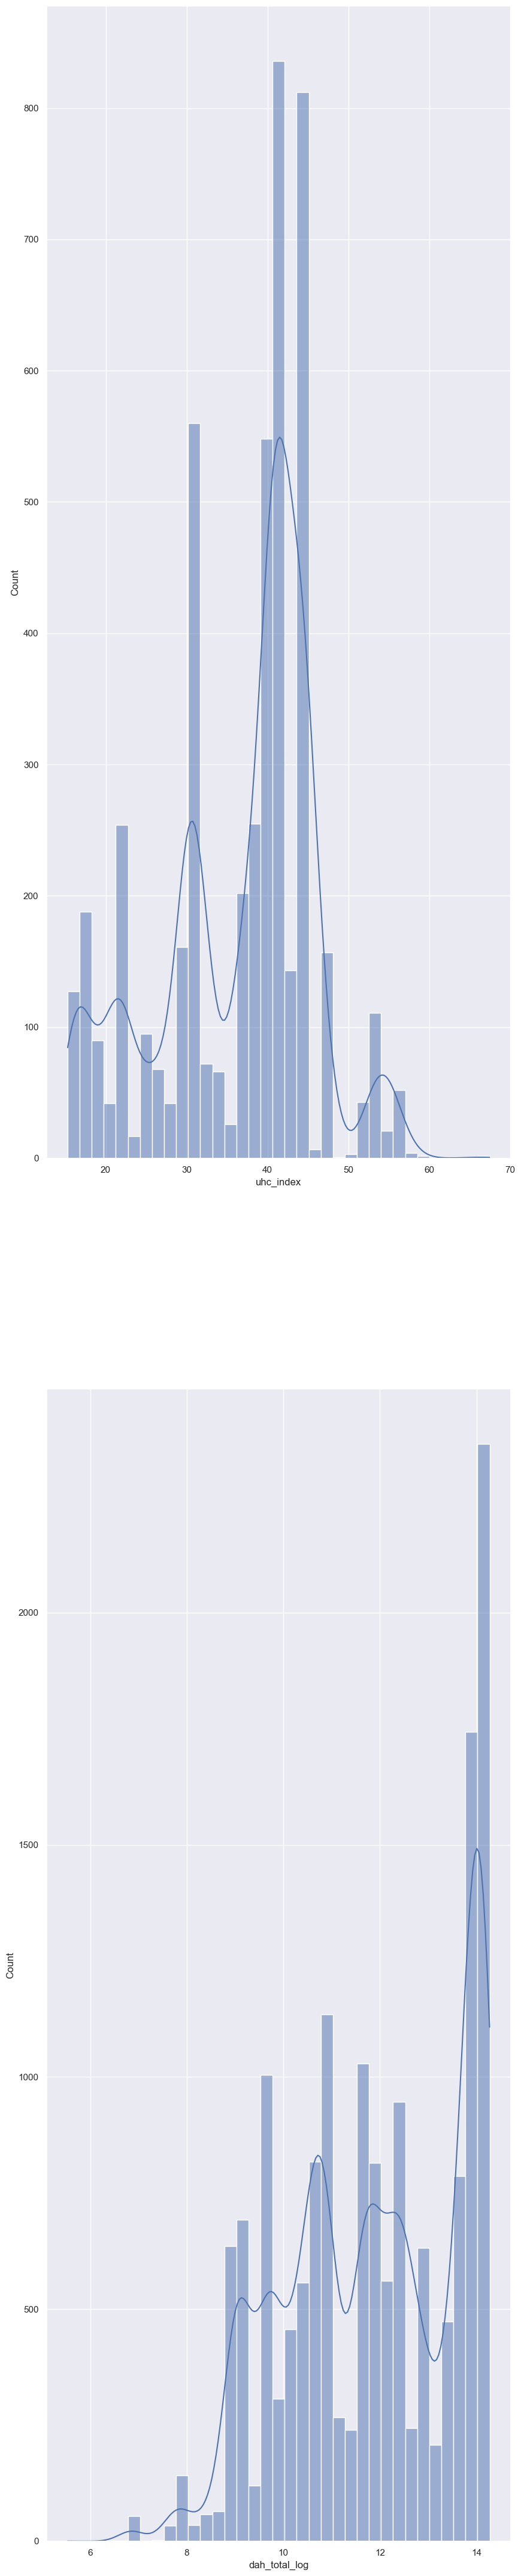

In [37]:
#produce distribution plots
figure, axes = plt.subplots(2,1,figsize=(10,55))
sns.histplot(data_analysis['uhc_index'],kde = True, ax=axes[0])
sns.histplot(data_analysis['dah_total_log'],kde = True, ax=axes[1])
plt.savefig('health_control_hist.png')
##dah has already been log transformed

In [38]:
#inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

iso                                                                                                                         0
year_id                                                                                                                     0
daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                        0
daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                        0
daly_mean_All causes_Unsafe water source_btsx_All ages                                                                      0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages        0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages                        0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages                

## controls package disaster

In [46]:
#get descriptives
display(data_analysis['log_access_drinkwater_index'].describe())
display(data_analysis['log_access_sani_index'].describe())
display(data_analysis['death_tot'].describe())
display(data_analysis['gdis_count_lag'].describe())

count    15317.000000
mean         1.551623
std          1.310777
min          0.000000
25%          0.000000
50%          1.877242
75%          2.981641
max          3.844097
Name: log_access_drinkwater_index, dtype: float64

count    15317.000000
mean         1.581392
std          1.510270
min          0.000000
25%          0.000000
50%          1.622151
75%          3.294486
max          3.846319
Name: log_access_sani_index, dtype: float64

count    17859.000000
mean       202.614872
std        422.343571
min          0.000000
25%         12.000000
50%         54.000000
75%        154.000000
max       7689.000000
Name: death_tot, dtype: float64

count    17859.000000
mean         3.296410
std          2.089757
min          0.000000
25%          1.791759
50%          3.688879
75%          5.209486
max          6.813445
Name: gdis_count_lag, dtype: float64

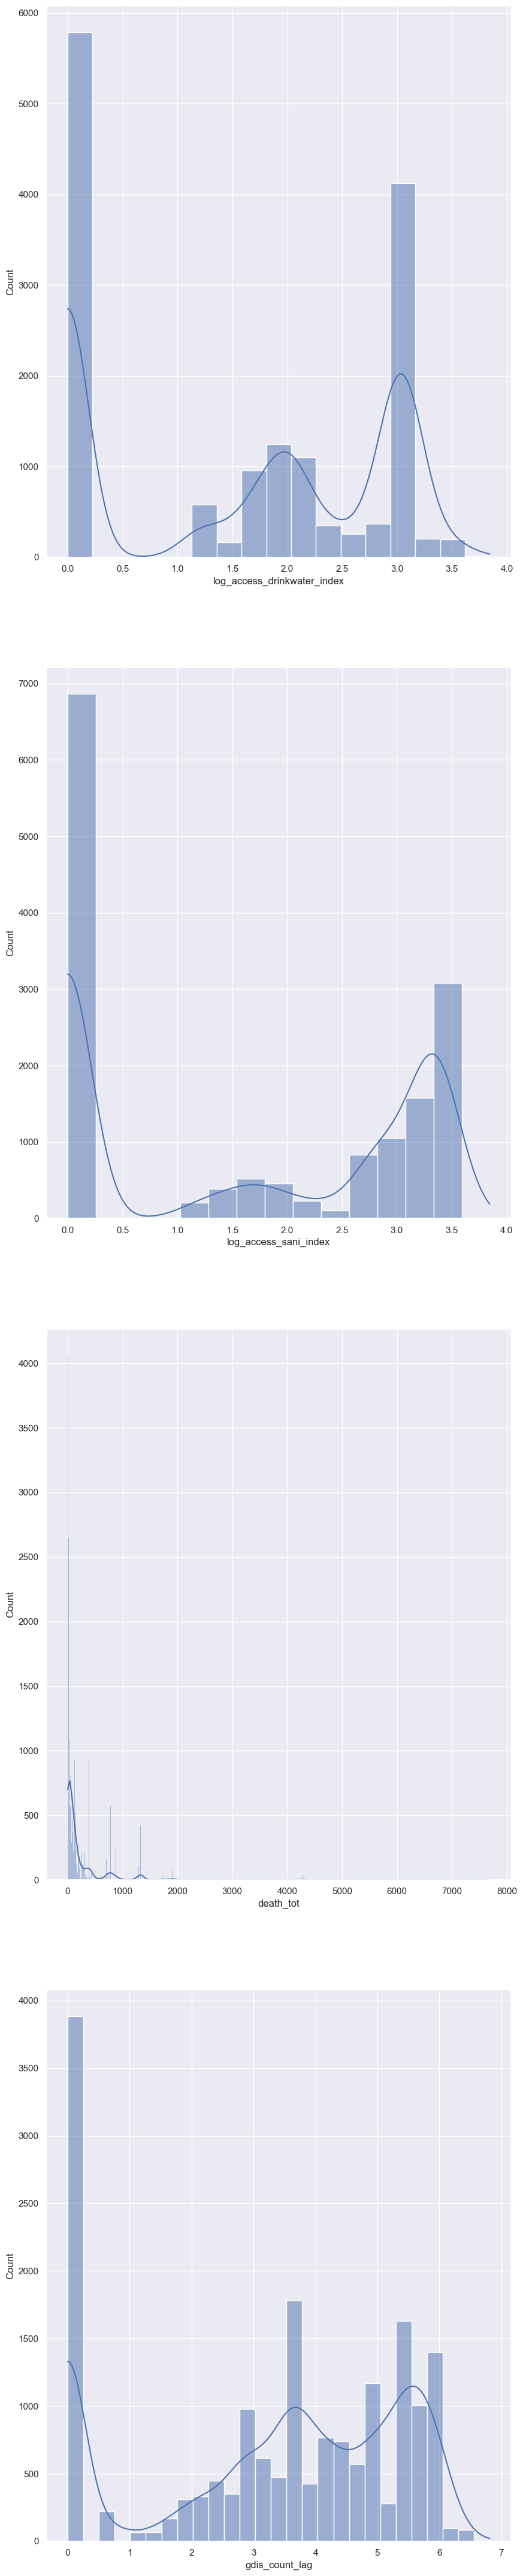

In [45]:
#produce distribution plots
figure, axes = plt.subplots(4,1,figsize=(10,55))
sns.histplot(data_analysis['log_access_drinkwater_index'],kde = True, ax=axes[0])
sns.histplot(data_analysis['log_access_sani_index'],kde = True, ax=axes[1])
sns.histplot(data_analysis['death_tot'],kde = True, ax=axes[2])
sns.histplot(data_analysis['gdis_count_lag'],kde = True, ax=axes[3])
plt.savefig('disasterspec_hist.png')

In [ ]:
#inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

In [47]:
custom_describe(data_analysis)

/var/folders/3l/pgxm2f9j3bbgbjcj2pyxl__00000gp/T/ipykernel_1875/1837570445.py:8: FutureWarning: ['iso'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  return frame.agg(func, **kwargs)


,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages,...,death_tot,tot_affect,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn
nullcounts,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
sum,AGOAGOAGOAGOAGOAGOAGOAGOAGOAGOAGOAGOAGOAGOAGOA...,3.584607e+07,7.410458e+07,9.246554e+07,1.278275e+08,7.410458e+07,9.246554e+07,1.278275e+08,4.759463e+07,9.246554e+07,...,3.618499e+06,1.227372e+10,1.815042e+06,1.483192e+06,58870.582609,2.943976e+08,5.300345e+07,2.678876e+08,2.678876e+08,2.943976e+08
mean,NaN,2.007171e+03,4.149425e+03,5.177532e+03,7.157594e+03,4.149425e+03,5.177532e+03,7.157594e+03,2.665022e+03,5.177532e+03,...,2.026149e+02,6.872566e+05,1.016318e+02,8.305011e+01,3.296410,1.648455e+04,2.967885e+03,1.500015e+04,1.500015e+04,1.648455e+04
median,NaN,2.008000e+03,3.873000e+03,4.326000e+03,6.385000e+03,3.873000e+03,4.326000e+03,6.385000e+03,2.380000e+03,4.326000e+03,...,5.400000e+01,3.085800e+04,3.900000e+01,3.600000e+01,3.688879,1.459600e+04,2.794000e+03,1.319400e+04,1.319400e+04,1.459600e+04
max,ZWE,2.019000e+03,1.753600e+04,2.456200e+04,3.201000e+04,1.753600e+04,2.456200e+04,3.201000e+04,1.171500e+04,2.456200e+04,...,7.689000e+03,2.332957e+07,9.090000e+02,7.780000e+02,6.813445,7.410800e+04,1.164000e+04,6.828700e+04,6.828700e+04,7.410800e+04


# Start the statistical analysis in python

In [48]:
import statsmodels

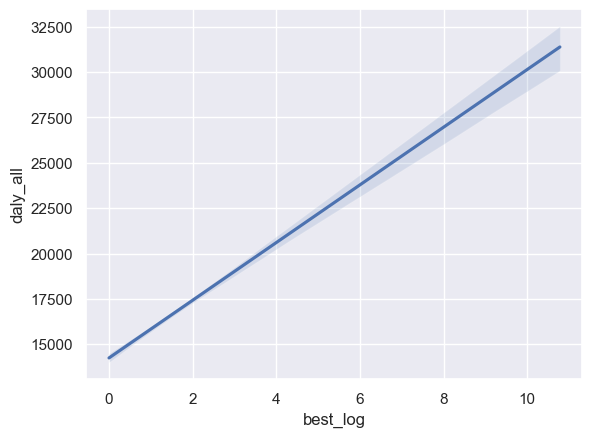

In [49]:
## simple regression plot with line of best fit between two variables
plot3 = sns.regplot(x='best_log',y='daly_all',data= data_analysis,scatter=False,fit_reg=True)

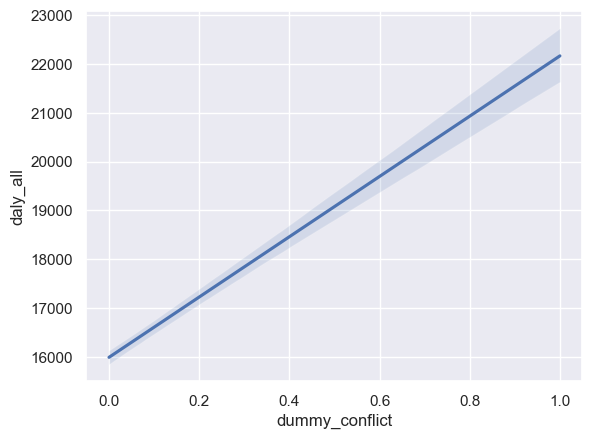

In [50]:
## simple regression plot with line of best fit between two variables
plot2 = sns.regplot(x='dummy_conflict',y='daly_all',data= data_analysis,scatter=False,fit_reg=True)

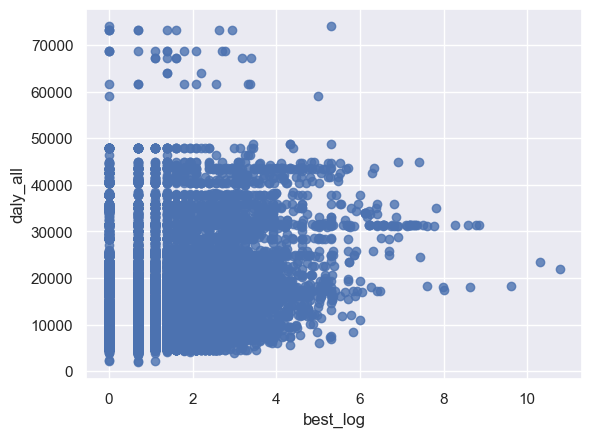

In [51]:
## simple regression scatterplot between two variables
plot4 = sns.regplot(x='best_log',y='daly_all',data= data_analysis,scatter=True,fit_reg=False)

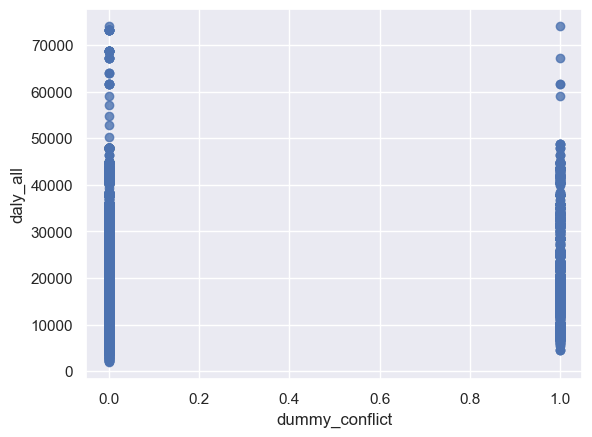

In [52]:
## simple regression scatterplot between two variables
plot4 = sns.regplot(x='dummy_conflict',y='daly_all',data= data_analysis,scatter=True,fit_reg=False)

[Text(0.5, 1.0, 'Y-o-Y % Change in daly versus Y-o-Y % Change in fatalities')]

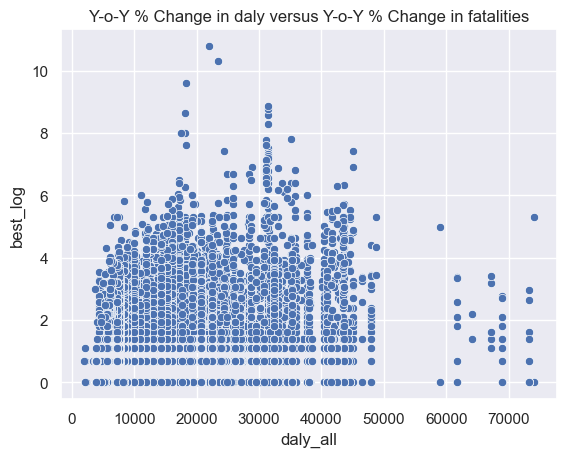

In [53]:
#plot of daly_all across all countries and years against the number of fatalities
 
sns.scatterplot(x=data_analysis['daly_all'], 
                y=data_analysis['best_log']).set(title='Y-o-Y % Change in daly versus Y-o-Y % Change in fatalities')

In [56]:
data.columns

Index(['iso', 'year_id',
       'daly_mean_All causes_No access to handwashing facility_btsx_All ages',
       'daly_mean_All causes_Unsafe sanitation_btsx_All ages',
       'daly_mean_All causes_Unsafe water source_btsx_All ages',
       'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages',
       'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages',
       'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages',
       'daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages',
       'daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages',
       'daly_mean_Diarrheal diseases_Unsafe water source_btsx_All ages',
       'daly_mean_Enteric infections_No access to handwashing facility_btsx_All ages',
       'daly_mean_Enteric infections_Unsafe sanitation_btsx_All ages',
       'daly_mean_Enteric in

In [92]:
data = data_analysis.copy()

In [93]:
data.columns

Index(['iso', 'year_id',
       'daly_mean_All causes_No access to handwashing facility_btsx_All ages',
       'daly_mean_All causes_Unsafe sanitation_btsx_All ages',
       'daly_mean_All causes_Unsafe water source_btsx_All ages',
       'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages',
       'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages',
       'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages',
       'daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages',
       'daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages',
       'daly_mean_Diarrheal diseases_Unsafe water source_btsx_All ages',
       'daly_mean_Enteric infections_No access to handwashing facility_btsx_All ages',
       'daly_mean_Enteric infections_Unsafe sanitation_btsx_All ages',
       'daly_mean_Enteric in

In [94]:
data.columns
data = data.filter(['iso', 'year_id','daly_all','best_log','best','dummy_conflict','dummy_neighbor','gdp_log','dah_total_log',
                    'age0014_value','xpd_gdp_value','uhc_index','lag_best_5', 'lag_best_10','lag_best_20','dummy_sb', 'dummy_ns', 'dummy_os','log_access_drinkwater_index', 'log_access_sani_index', 'death_tot','tot_affect', 'gdis_count_lag'])

In [58]:
# Load the required packages
import pandas as pd
import statsmodels.api as sm

# Set the index to the panel data structure
data = data_analysis.set_index(['iso', 'year_id'])

# Create a fixed effects model with country fixed effects
exog_vars = data[['best_log','lag_best_5', 'lag_best_10','gdp_log','lag_best_20', 'age0014_value','xpd_gdp_value','dah_total_log','uhc_index']]
exog = sm.add_constant(data[exog_vars])
fe_model = sm.PanelOLS(data['daly_all'], exog, entity_effects=True)

# Cluster standard errors at the country level
fe_model = fe_model.fit(cov_type='clustered', cluster_entity=True)

# Print the regression output
print(fe_model.summary)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


ImportError: cannot import name '_centered' from 'scipy.signal.signaltools' (/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/scipy/signal/signaltools.py)

In [60]:
?PanelOLS

Init signature:
PanelOLS(
    dependent: 'PanelDataLike',
    exog: 'PanelDataLike',
    *,
    weights: 'Optional[PanelDataLike]' = None,
    entity_effects: 'bool' = False,
    time_effects: 'bool' = False,
    other_effects: 'Optional[PanelDataLike]' = None,
    singletons: 'bool' = True,
    drop_absorbed: 'bool' = False,
    check_rank: 'bool' = True,
) -> 'None'
Docstring:     
One- and two-way fixed effects estimator for panel data

Parameters
----------
dependent : array_like
    Dependent (left-hand-side) variable (time by entity).
exog : array_like
    Exogenous or right-hand-side variables (variable by time by entity).
weights : array_like
    Weights to use in estimation.  Assumes residual variance is
    proportional to inverse of weight to that the residual time
    the weight should be homoskedastic.
entity_effects : bool
    Flag whether to include entity (fixed) effects in the model
time_effects : bool
    Flag whether to include time effects in the model
other_effects

In [73]:
#the country fixed effects model without
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0283
Estimator:                   PanelOLS   R-squared (Between):              0.1141
No. Observations:               17553   R-squared (Within):               0.0283
Date:                Mon, May 08 2023   R-squared (Overall):              0.1127
Time:                        13:59:15   Log-likelihood                -1.764e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      511.06
Entities:                          29   P-value                           0.0000
Avg Obs:                       605.28   Distribution:                 F(1,17523)
Min Obs:                       1.0000                                           
Max Obs:                       4603.0   F-statistic (robust):             11.725
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [114]:
#the country fixed effects model LAGS
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_conflict_history.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0708
Estimator:                   PanelOLS   R-squared (Between):              0.2819
No. Observations:               17271   R-squared (Within):               0.0708
Date:                Mon, May 08 2023   R-squared (Overall):              0.2722
Time:                        14:42:28   Log-likelihood                -1.732e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      328.28
Entities:                          22   P-value                           0.0000
Avg Obs:                       785.05   Distribution:                 F(4,17245)
Min Obs:                       8.0000                                           
Max Obs:                       4583.0   F-statistic (robust):             8.8234
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [113]:
#the country fixed effects model STANDARD
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])

y= data1['daly_all']
x= data1[['best_log','gdp_log', 'age0014_value','xpd_gdp_value',]]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('resuts_standard.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.5805
Estimator:                   PanelOLS   R-squared (Between):             -12.300
No. Observations:                7599   R-squared (Within):               0.5805
Date:                Mon, May 08 2023   R-squared (Overall):             -10.695
Time:                        14:42:15   Log-likelihood                 -7.21e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2621.3
Entities:                          19   P-value                           0.0000
Avg Obs:                       399.95   Distribution:                  F(4,7576)
Min Obs:                       1.0000                                           
Max Obs:                       1992.0   F-statistic (robust):             162.01
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [112]:
#the country fixed effects model HEALTH
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','dah_total_log','uhc_index']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_health_specification.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.6603
Estimator:                   PanelOLS   R-squared (Between):             -5.3257
No. Observations:                3520   R-squared (Within):               0.6603
Date:                Mon, May 08 2023   R-squared (Overall):             -6.0785
Time:                        14:42:02   Log-likelihood                 -3.22e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2263.7
Entities:                          23   P-value                           0.0000
Avg Obs:                       153.04   Distribution:                  F(3,3494)
Min Obs:                       1.0000                                           
Max Obs:                       1145.0   F-statistic (robust):             10.115
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [111]:
#the country fixed effects model DISASTER
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','log_access_drinkwater_index', 'log_access_sani_index', 'death_tot','gdis_count_lag']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_disaster_specification.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.4360
Estimator:                   PanelOLS   R-squared (Between):             -8.1095
No. Observations:               15036   R-squared (Within):               0.4360
Date:                Mon, May 08 2023   R-squared (Overall):             -15.333
Time:                        14:41:32   Log-likelihood                -1.452e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2319.7
Entities:                          28   P-value                           0.0000
Avg Obs:                       537.00   Distribution:                 F(5,15003)
Min Obs:                       1.0000                                           
Max Obs:                       4569.0   F-statistic (robust):             8.4389
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [115]:
#the country fixed effects model ALL
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20','gdp_log', 'age0014_value','xpd_gdp_value','dah_total_log','uhc_index']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_all.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.8999
Estimator:                   PanelOLS   R-squared (Between):             -401.35
No. Observations:                1348   R-squared (Within):               0.8999
Date:                Mon, May 08 2023   R-squared (Overall):             -200.77
Time:                        14:42:43   Log-likelihood                -1.153e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1325.1
Entities:                          13   P-value                           0.0000
Avg Obs:                       103.69   Distribution:                  F(9,1326)
Min Obs:                       1.0000                                           
Max Obs:                       412.00   F-statistic (robust):          3.241e+04
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [116]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor','dummy_ns']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_ns.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0188
Estimator:                   PanelOLS   R-squared (Between):             -0.1222
No. Observations:               17689   R-squared (Within):               0.0188
Date:                Mon, May 08 2023   R-squared (Overall):             -0.1085
Time:                        14:43:00   Log-likelihood                -1.774e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      112.81
Entities:                          34   P-value                           0.0000
Avg Obs:                       520.26   Distribution:                 F(3,17652)
Min Obs:                       1.0000                                           
Max Obs:                       4603.0   F-statistic (robust):             22.543
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [117]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor','dummy_os',]]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_os.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0133
Estimator:                   PanelOLS   R-squared (Between):             -0.1420
No. Observations:               17689   R-squared (Within):               0.0133
Date:                Mon, May 08 2023   R-squared (Overall):             -0.1415
Time:                        14:43:11   Log-likelihood                -1.774e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      79.137
Entities:                          34   P-value                           0.0000
Avg Obs:                       520.26   Distribution:                 F(3,17652)
Min Obs:                       1.0000                                           
Max Obs:                       4603.0   F-statistic (robust):             21.988
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [119]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor','dummy_sb']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_sb.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0163
Estimator:                   PanelOLS   R-squared (Between):             -0.1616
No. Observations:               17689   R-squared (Within):               0.0163
Date:                Mon, May 08 2023   R-squared (Overall):             -0.1658
Time:                        14:43:38   Log-likelihood                -1.774e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      97.416
Entities:                          34   P-value                           0.0000
Avg Obs:                       520.26   Distribution:                 F(3,17652)
Min Obs:                       1.0000                                           
Max Obs:                       4603.0   F-statistic (robust):             22.538
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [120]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor','dummy_sb','dummy_ns','dummy_os']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_all.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0201
Estimator:                   PanelOLS   R-squared (Between):             -0.2314
No. Observations:               17689   R-squared (Within):               0.0201
Date:                Mon, May 08 2023   R-squared (Overall):             -0.2441
Time:                        14:43:57   Log-likelihood                -1.774e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      72.367
Entities:                          34   P-value                           0.0000
Avg Obs:                       520.26   Distribution:                 F(5,17650)
Min Obs:                       1.0000                                           
Max Obs:                       4603.0   F-statistic (robust):             14.048
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [ ]:
### but the PANELOLS function from lienarmodels does exactly that already
'dummy_sb', 'dummy_ns', 'dummy_os',
       'intensity', 'dummy_low_intensity', 'dummy_medium_intensity',
       'dummy_high_intensity'

In [ ]:
#standard = data['age0014_value','gdp_log','xpd_gdp_value']
#health = data['uhc_index','dah_total_log']

from linearmodels.panel import PanelOLS
mod = PanelOLS.from_formula('daly_all ~ best_log+lag_best_10+gdp_log+lag_best_20+age0014_value+xpd_gdp_value+dah_total_log+uhc_index',data=data.set_index(['iso','year_id']))
result = mod.fit(cov_type='clustered', cluster_entity=True)
result.summary.tables[1]
with open('panel_ols_results.txt', 'w') as f:
    f.write(res.summary.as_text())
print(result)

In [ ]:
# Create a copy of the data for imputation
import statsmodels.api as sm
from statsmodels.api import PanelOLS
imputed_data = data.copy()


# Estimate a fixed effects model with the imputed data
y = imputed_data["daly_all"]
X = imputed_data[['best_log','gdp_log','dah_total_log','age0014_value','xpd_gdp_value','uhc_index','lag_best_5', 'lag_best_10',]]
fe_model = sm.PanelOLS(y, X, entity_effects=True)
fe_results = fe_model.fit(cov_type='clustered', cluster_entity=True)

fe_results
# Print the regression results
#fe_results.summary.as_latex()

In [ ]:
import pytablewriter
from pytablewriter import MarkdownTableWriter
import subprocess

# Create a table with the regression output
table = result.summary.as_text()

# Convert the table to Markdown format
writer = MarkdownTableWriter()
writer.table_name = "Regression Results"
writer.headers = ["", "Coefficient", "Std. Error", "t-value", "P-value"]
for row in table.split("\n")[1:]:
    writer.value_matrix.append(row.split())

# Generate LaTeX code from the Markdown table
latex_code = writer.dumps().replace("\\%", "%")

# Compile the LaTeX code to PDF using pdflatex
process = subprocess.Popen(["pdflatex", "-interaction=nonstopmode"], stdin=subprocess.PIPE)
process.communicate(latex_code.encode())

# Save the PDF output
#with open("regression_results.pdf", "wb") as f:
 #   f.write(process.stdout.read())

In [ ]:
#can throw out the xpd_gdp_value since it has too much missingness and is insignificant

In [ ]:
### now I try my luck in R